In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pp_i
from tensorflow.keras.layers import RandomFlip, RandomRotation, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import joblib

In [27]:
imageBaseFolder : str = "D:/Internship/PetClassification/pet_dataset/images"
folderContentList: list = [os.path.basename(file) for file in glob.glob(os.path.join(imageBaseFolder, '*.jpg'))]

In [28]:
folderContentList

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg',
 'Abyssinian_108.jpg',
 'Abyssinian_109.jpg',
 'Abyssinian_11.jpg',
 'Abyssinian_110.jpg',
 'Abyssinian_111.jpg',
 'Abyssinian_112.jpg',
 'Abyssinian_113.jpg',
 'Abyssinian_114.jpg',
 'Abyssinian_115.jpg',
 'Abyssinian_116.jpg',
 'Abyssinian_117.jpg',
 'Abyssinian_118.jpg',
 'Abyssinian_119.jpg',
 'Abyssinian_12.jpg',
 'Abyssinian_120.jpg',
 'Abyssinian_121.jpg',
 'Abyssinian_122.jpg',
 'Abyssinian_123.jpg',
 'Abyssinian_124.jpg',
 'Abyssinian_125.jpg',
 'Abyssinian_126.jpg',
 'Abyssinian_127.jpg',
 'Abyssinian_128.jpg',
 'Abyssinian_129.jpg',
 'Abyssinian_13.jpg',
 'Abyssinian_130.jpg',
 'Abyssinian_131.jpg',
 'Abyssinian_132.jpg',
 'Abyssinian_133.jpg',
 'Abyssinian_134.jpg',
 'Abyssinian_135.jpg',
 'Abyssinian_136.jpg',
 'Abyssinian_137.jpg',
 'Abyssinian_138.

In [50]:
imagesLabelsList = [nomenclature.lower() for nomenclature in {" ".join(name.split("_")[:-1]) for name in folderContentList}]
imagesLabelsList.sort()

In [30]:
def labelEncoding(name: str) -> int | None:
 if (name == 'saint bernard'): return 0
 if (name == 'bombay'): return 1
 if (name == 'japanese chin'): return 2
 if (name == 'great pyrenees'): return 3
 if (name == 'pomeranian'): return 4
 if (name == 'samoyed'): return 5
 if (name == 'keeshond'): return 6
 if (name == 'american bulldog'): return 7
 if (name == 'basset hound'): return 8
 if (name == 'american pit bull terrier'): return 9
 if (name == 'scottish terrier'): return 10
 if (name == 'havanese'): return 11
 if (name == 'english setter'): return 12
 if (name == 'pug'): return 13
 if (name == 'sphynx'): return 14
 if (name == 'chihuahua'): return 15
 return 



In [31]:
features = []
labels = []
SIZE = (224, 224)

for file in folderContentList:
    label = " ".join(file.split('_')[:-1]).lower()
    labelenc = labelEncoding(label)
    if labelenc is not None:
        image = load_img(os.path.join(imageBaseFolder, file))
        image = tf.image.resize_with_pad(img_to_array(image, dtype='uint8'), *SIZE).numpy().astype("uint8")
        features.append(image)
        labels.append(labelenc)

In [34]:
feature_array = np.array(features)
labels_array = np.array(labels)
labelsOneHotEncoding = to_categorical(labels_array, num_classes=16)

In [35]:
xTrain, xTest, yTrain, yTest = train_test_split(feature_array, labelsOneHotEncoding, test_size=0.2, random_state=42)
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.25, random_state=12)

In [37]:
data_augmentation = Sequential([RandomFlip('horizontal_and_vertical'), RandomRotation(0.2)])
prediction_layer = Dense(16, activation='softmax')

In [38]:
resnet_model = ResNet50(include_top=False, pooling='avg', weights='imagenet')
resnet_model.trainable = False

In [39]:
inputs = Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = pp_i(x)
x = resnet_model(x, training=False)
x = Dropout(0.2)(x)
outputs = prediction_layer(x)
model = Model(inputs, outputs)

In [40]:
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])
model_history = model.fit(x=xTrain, y=yTrain, validation_data=(xVal, yVal), epochs=20)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.3291 - loss: 2.3233 - val_accuracy: 0.8906 - val_loss: 0.4351
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.7921 - loss: 0.6775 - val_accuracy: 0.9469 - val_loss: 0.2578
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.8435 - loss: 0.4587 - val_accuracy: 0.9344 - val_loss: 0.2204
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - accuracy: 0.8590 - loss: 0.4307 - val_accuracy: 0.9438 - val_loss: 0.2108
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.8797 - loss: 0.3832 - val_accuracy: 0.9422 - val_loss: 0.1704
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - accuracy: 0.8869 - loss: 0.3412 - val_accuracy: 0.9453 - val_loss: 0.1679
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.9043 - loss: 0.2953 - val_accuracy: 0.9500 - val_loss: 0.1616
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.9091 - loss: 0.2867 - val_accuracy: 0.9547 - v

In [41]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

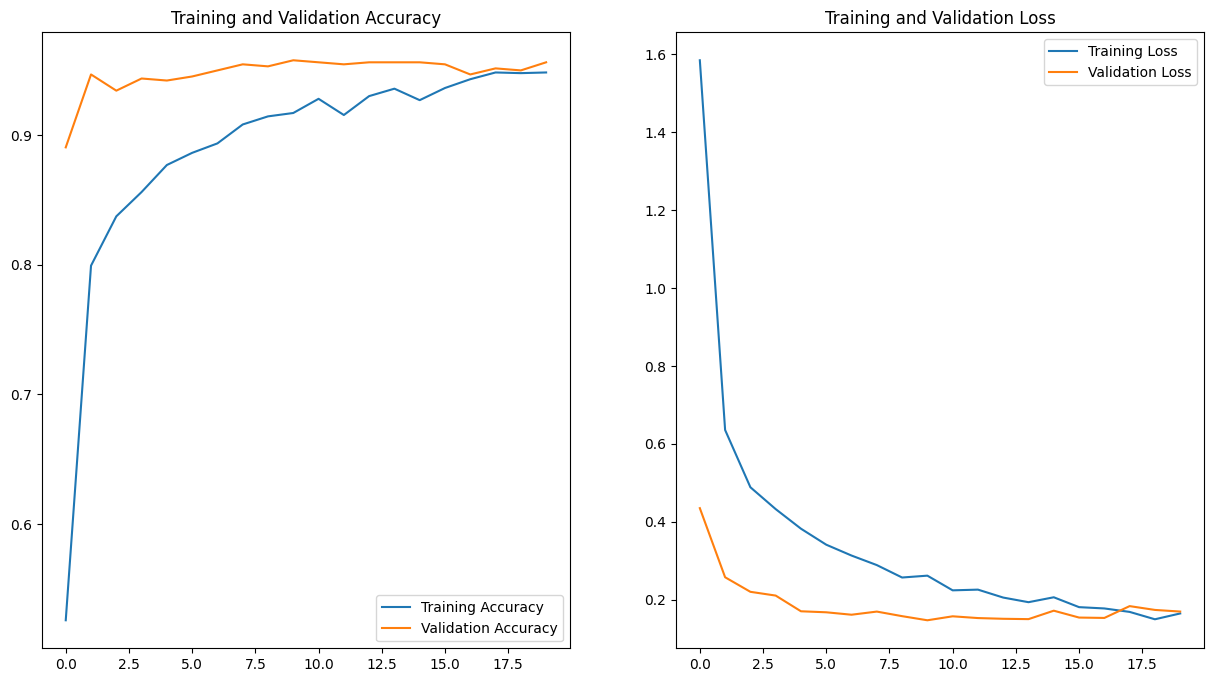

In [42]:
epochs_range = range(20)
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

In [43]:
model.evaluate(xTest, yTest)

20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9505 - loss: 0.1636


[0.14106667041778564, 0.956250011920929]

In [44]:
y_pred = model.predict(xTest)
y_pred

20/20 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step


array([[9.97817397e-01, 3.25627386e-10, 9.86950272e-06, ...,
        2.16604531e-06, 3.31111916e-10, 4.03945286e-08],
       [4.78377751e-06, 1.25587917e-06, 9.81616085e-06, ...,
        4.07427052e-08, 8.41609202e-03, 9.81367648e-01],
       [1.72744535e-06, 9.99022603e-01, 1.07676547e-04, ...,
        1.26849438e-04, 4.70256520e-04, 1.12719690e-05],
       ...,
       [8.86620837e-05, 3.46686079e-06, 2.69624729e-06, ...,
        2.24572694e-04, 1.43437195e-04, 2.49436096e-04],
       [2.07375365e-06, 1.12322560e-07, 6.37241797e-08, ...,
        9.99993324e-01, 4.48220933e-10, 2.82777449e-07],
       [3.70568298e-10, 9.99993324e-01, 9.19930940e-08, ...,
        1.06582036e-07, 5.00333408e-06, 1.87441773e-09]], dtype=float32)

In [48]:
joblib.dump(model, "imgClassifierPet.pkl")

['imgClassifierPet.pkl']

In [49]:
joblib.dump(model, "imgClassifierPet.h3")

['imgClassifierPet.h3']

In [1]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import joblib

In [2]:
model = joblib.load("imgClassifierPet.pkl")


In [3]:
imageBaseFolder = "D:/Internship/PetClassification/pet_dataset/images"
image_files = [os.path.join(imageBaseFolder, file) for file in os.listdir(imageBaseFolder) if file.endswith('.jpg')]

In [7]:
random_images = random.sample(image_files, 200)


In [8]:
preprocessed_images = []
for image_path in random_images:
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    preprocessed_images.append(image)


In [ ]:
for image, image_path in zip(preprocessed_images, random_images):
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)
    
    # Decode the predicted label
    labels = ['saint bernard', 'bombay', 'japanese chin', 'great pyrenees', 'pomeranian',
              'samoyed', 'keeshond', 'american bulldog', 'basset hound', 'american pit bull terrier',
              'scottish terrier', 'havanese', 'english setter', 'pug', 'sphynx', 'chihuahua']
    predicted_pet = labels[predicted_label]
    
    print(f"Image: {os.path.basename(image_path)}")
    print(f"Predicted Pet: {predicted_pet}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Image: great_pyrenees_15.jpg
Predicted Pet: great pyrenees

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Image: saint_bernard_97.jpg
Predicted Pet: saint bernard

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Image: Bombay_62.jpg
Predicted Pet: bombay

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Image: scottish_terrier_102.jpg
Predicted Pet: scottish terrier

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Image: wheaten_terrier_42.jpg
Predicted Pet: scottish terrier

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Image: great_pyrenees_172.jpg
Predicted Pet: great pyrenees

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Image: wheaten_terrier_75.jpg
Predicted Pet: great pyrenees

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Image: english_setter_68.jpg
Predicted Pet: english setter

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Image: american_pit_bull_terrier_54.jpg
Predicted Pet: sphynx

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Image: basset_hound_48.jpg
Predicted Pet: basset hound

1/1 ━━━━━━━━━━━━━━━━━━